c:\Users\tshan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tshan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\tshan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tshan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

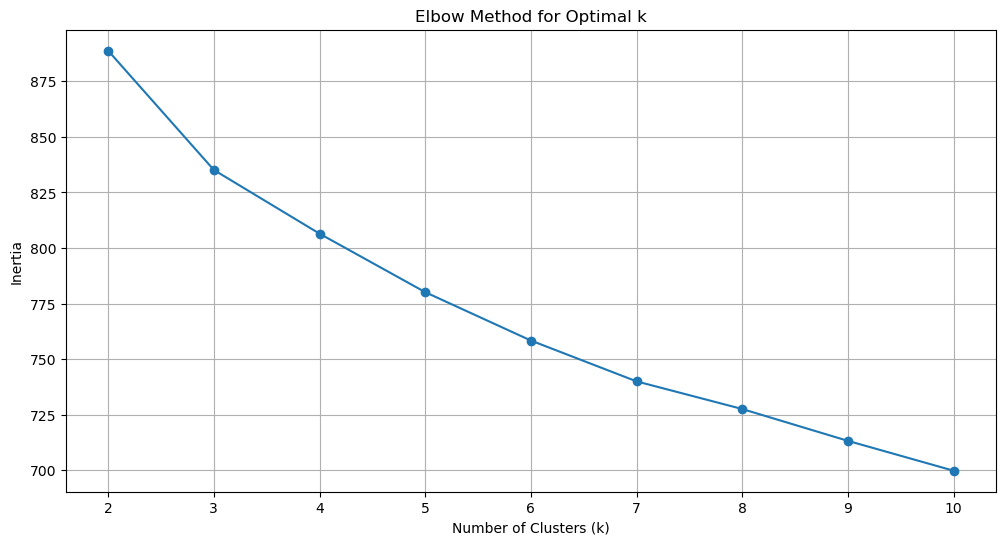

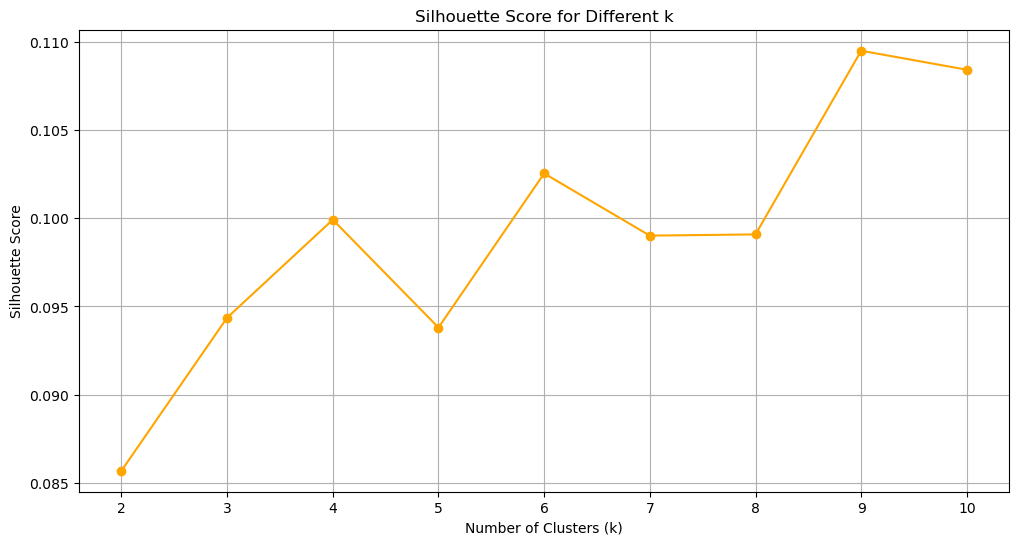

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "C:/Users/tshan/Downloads/Listings of All current Employees at AI startups.xlsx"  

# Load the Excel file to check sheet names
excel_file = pd.ExcelFile(file_path)

# Load and combine all sheets into a single DataFrame
all_sheets_data = {sheet_name: excel_file.parse(sheet_name) for sheet_name in excel_file.sheet_names}
employee_data = pd.concat(all_sheets_data.values(), ignore_index=True)

# Extract the job_title column and drop NaN values
job_titles = employee_data['job_title'].dropna()

# Load a pre-trained SentenceTransformer model for word embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for job titles
job_titles = job_titles.reset_index(drop=True)
job_titles = job_titles.astype(str)
job_title_embeddings = model.encode(job_titles)

# Determine the optimal number of clusters using the elbow method
inertia = []
silhouette_scores = []
k_range = range(2, 11)  # Test 2 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(job_title_embeddings)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(job_title_embeddings, kmeans.labels_))

# Prepare the results for visualization
results = {
    "k": list(k_range),
    "Inertia": inertia,
    "Silhouette Score": silhouette_scores
}

import matplotlib.pyplot as plt

# Plot Inertia (Elbow Method)
plt.figure(figsize=(12, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(12, 6))
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Would you like to proceed with clustering using a specific k? Let me know your choice!


c:\Users\tshan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tshan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


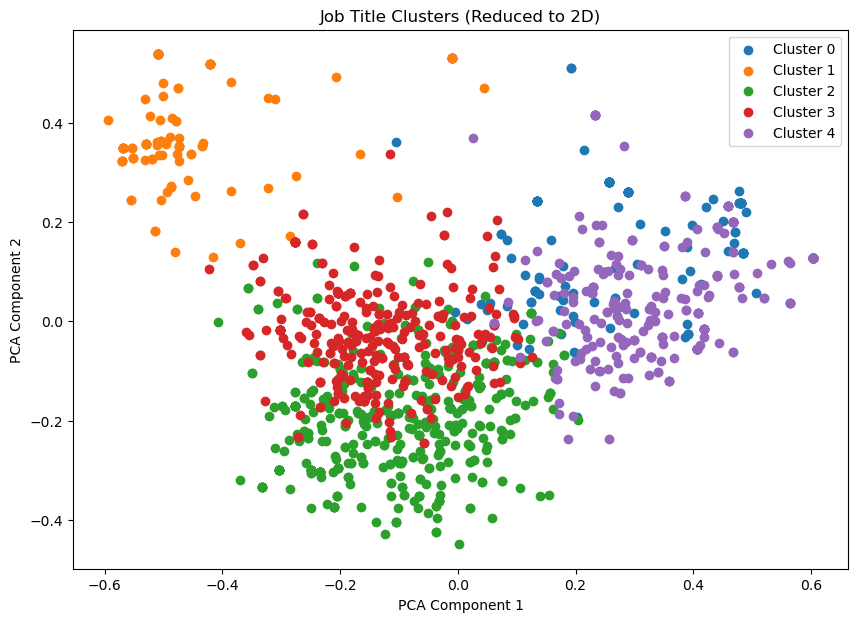

'C:/Users/tshan/Downloads/clustered_job_titles.csv'

In [14]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# Apply K-Means Clustering with k=4
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(job_title_embeddings)

# Combine Job Titles with Cluster Labels
clustered_data = pd.DataFrame({
    "Job Title": job_titles,
    "Cluster": clusters
})

# Save clustered results to CSV
output_path = "C:/Users/tshan/Downloads/clustered_job_titles.csv"
clustered_data.to_csv(output_path, index=False)

# Visualize Clusters using PCA for Dimensionality Reduction
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(job_title_embeddings)

# Scatter Plot of Clusters
plt.figure(figsize=(10, 7))
for i in range(5):
    plt.scatter(
        reduced_embeddings[clusters == i, 0], 
        reduced_embeddings[clusters == i, 1], 
        label=f"Cluster {i}"
    )

plt.title("Job Title Clusters (Reduced to 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

# Provide download link for the clustered CSV
output_path

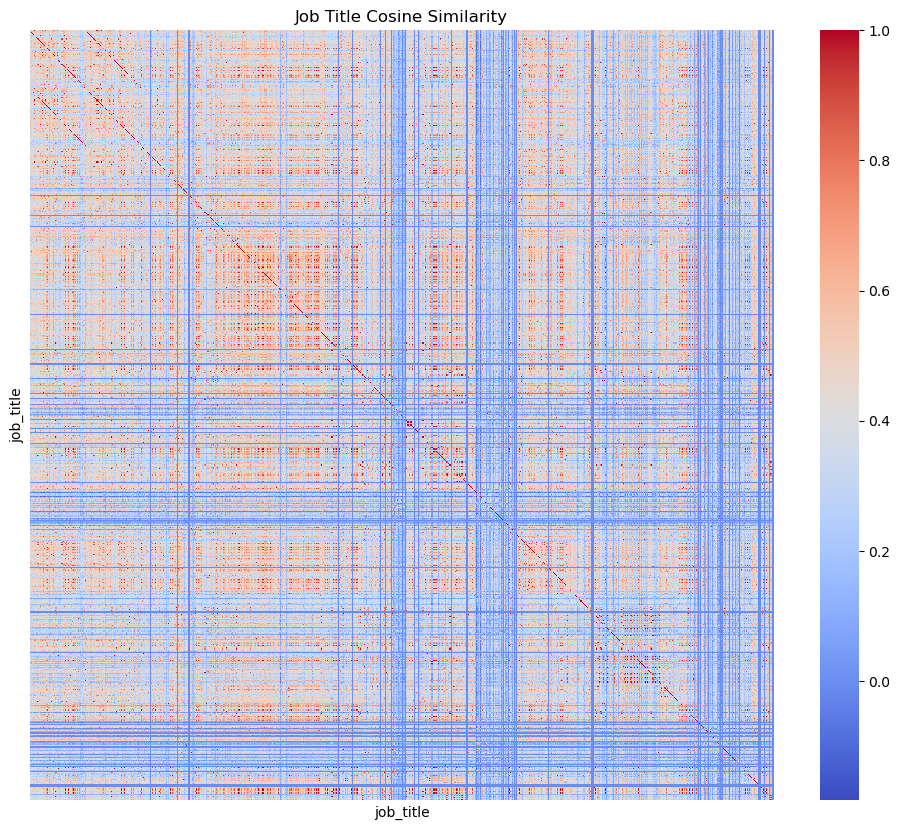

In [ ]:
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

# Step 1: Load Pre-trained Word2Vec Model
word2vec_path = "C:/Users/tshan/Downloads/GoogleNews-vectors-negative300.bin.gz"
word2vec_model = KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

# Step 2: Preprocess Job Titles
def preprocess_title(title):
    words = title.split()  # Simple tokenization; you can improve with NLTK/spacy
    return [word for word in words if word in word2vec_model]

# Tokenize and filter words
job_titles_tokens = job_titles.apply(preprocess_title)

# Step 3: Calculate Word2Vec Encodings
def compute_title_vector(tokens):
    if not tokens:
        return np.zeros(word2vec_model.vector_size)
    return np.sum([word2vec_model[word] for word in tokens], axis=0)

# Compute summed embeddings for each job title
job_title_embeddings = job_titles_tokens.apply(compute_title_vector)

# Convert to NumPy array for similarity computation
job_title_embeddings = np.stack(job_title_embeddings)

# Step 4: Calculate Cosine Similarity
cosine_sim_matrix = cosine_similarity(job_title_embeddings)

# Step 5: Save or Visualize Results
# Convert similarity matrix to a DataFrame for better readability
similarity_df = pd.DataFrame(cosine_sim_matrix, index=job_titles, columns=job_titles)

# Save similarity matrix to CSV
similarity_df.to_csv("job_title_cosine_similarity.csv")


C:\Users\tshan\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25237 (\N{CJK UNIFIED IDEOGRAPH-6295}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tshan\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36039 (\N{CJK UNIFIED IDEOGRAPH-8CC7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tshan\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23478 (\N{CJK UNIFIED IDEOGRAPH-5BB6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tshan\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36719 (\N{CJK UNIFIED IDEOGRAPH-8F6F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tshan\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 202

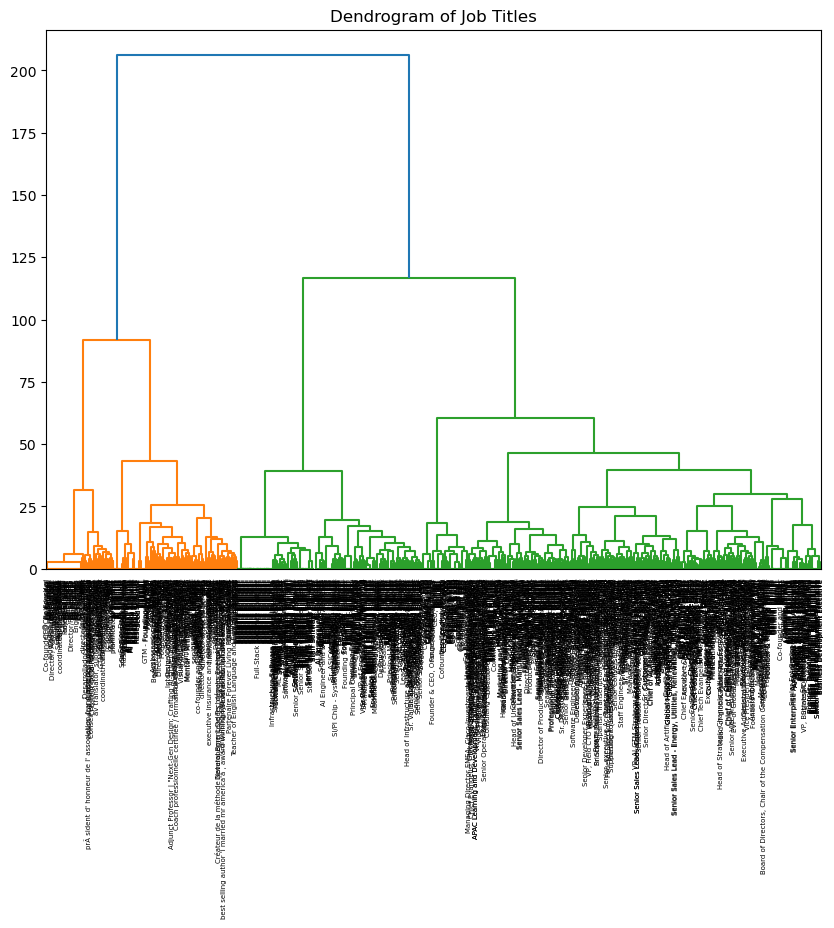

                                     Job Title  Cluster
0          Business Development Representative       12
1               Global Talent Acquisition Lead        9
2     Professional Services Engagement Manager        8
3            Director Partnerships & Alliances        8
4                 Snr Manager Customer Support        8
...                                        ...      ...
1368                      Founding AI Engineer        6
1369                     Head of Model Quality        9
1370                           CEO, Co-Founder        1
1371                         Founding Engineer        6
1372                  Co-founder @Chaindesk.ai        1

[1373 rows x 2 columns]


In [25]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Perform hierarchical clustering
linkage_matrix = linkage(cosine_distance_matrix, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=job_titles.values, leaf_rotation=90)
plt.title("Dendrogram of Job Titles")
plt.show()

# Get cluster labels
n_clusters = 12  # Choose the number of clusters
labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

# Add cluster labels to the DataFrame
clustered_job_titles = pd.DataFrame({
    'Job Title': job_titles,
    'Cluster': labels
})
print(clustered_job_titles)

# Save to CSV
output_path = "hierarchical_clustered_job_titles.csv"
clustered_job_titles.to_csv(output_path, index=False)
